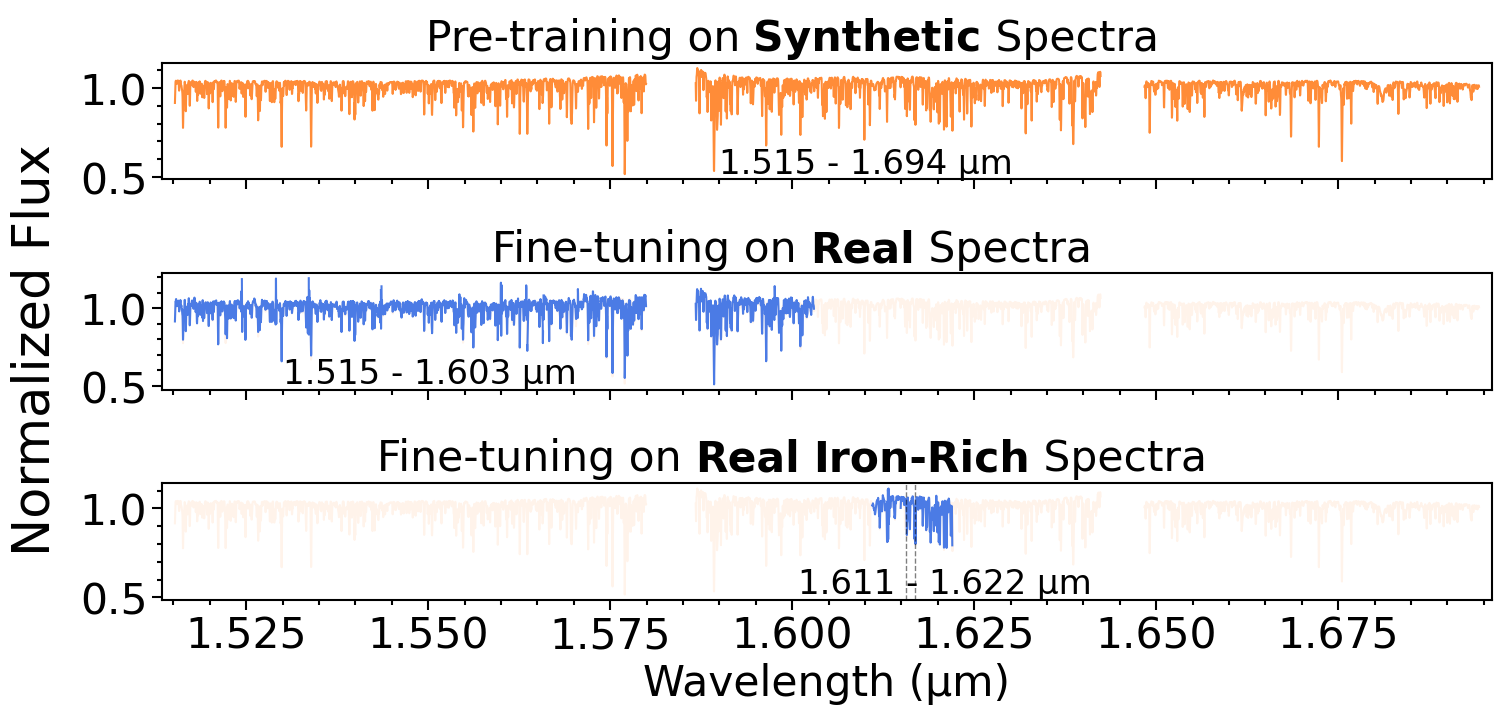

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from highlight_text import ax_text
plt.style.use('../../utils/mystyle.mplstyle')
#font sans-serif
plt.rcParams['font.family'] = 'sans-serif'
# Load the data
aspcap_spectra = np.load('../aspcap_spectra_test.npy')
synspec = np.load('../synspec_test.npy')

# Load the wavelength data
wavelength = np.loadtxt('../apogee_wavelength_sol.csv', delimiter=',')
wavelength = wavelength / 10000  # Convert to microns

# Create three subplots with shared x-axis
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(16, 8), sharex=True)

# Increase font size for all text elements
plt.rcParams.update({'font.size': plt.rcParams['font.size'] * 1.7})
color1 = '#FF8C38'  # Warm coral orange
color2 = '#4B7BE5'  # Rich royal blue
# Define detector gap boundaries
gap1 = (1.579931, 1.586755)  # Converted to microns
gap2 = (1.642381, 1.648405)  # Converted to microns
split_points = [(wavelength.min(), gap1[0]), (gap1[1], gap2[0]), (gap2[1], wavelength.max())]
random_index = 23161

# Plot 1: Pre-training synthetic (entire spectrum)
for start, end in split_points:
    mask = (wavelength >= start) & (wavelength <= end)
    ax1.plot(wavelength[mask], synspec[random_index][mask], color=color1)
ax_text(1.6, 1.28, 'Pre-training on <Synthetic> Spectra', highlight_textprops=[{"weight": "bold"}], ha='center', va='center', fontsize=plt.rcParams['font.size'], ax=ax1)
ax1.text(1.59, 0.52, '1.515 - 1.694 µm', fontsize=plt.rcParams['font.size'] * 0.8)

# Set x-limits to 1% beyond min and max wavelengths for all plots
x_min = wavelength.min()
x_max = wavelength.max() 
x_padding = (x_max - x_min) * 0.01
ax1.set_xlim(x_min - x_padding, x_max + x_padding)

# Plot 2: Fine-tuning on real (15150 to 16030)
region_mask = (wavelength >= 1.515) & (wavelength <= 1.603)  # Converted to microns
for start, end in split_points:
    mask = (wavelength >= start) & (wavelength <= end)
    ax2.plot(wavelength[mask], synspec[random_index][mask], color=color1, alpha=0.1)  # Add synthetic spectrum with gaps
mask = (wavelength >= 1.515) & (wavelength <= 1.603)  # Converted to microns
for start, end in split_points:
    mask = (wavelength >= start) & (wavelength <= end) & (wavelength <= 1.603)  # Converted to microns
    ax2.plot(wavelength[mask], aspcap_spectra[random_index][mask], color=color2)
ax_text(1.6, 1.38, 'Fine-tuning on <Real> Spectra', highlight_textprops=[{"weight": "bold"}], ha='center', va='center', fontsize=plt.rcParams['font.size'], ax=ax2)
ax2.text(1.53, 0.52, '1.515 - 1.603 µm', fontsize=plt.rcParams['font.size'] * 0.8)

# Plot 3: Fine-tuning on 100 real stars (1.611 to 1.622 µm)
region_mask = (wavelength >= 1.611) & (wavelength <= 1.622)  # Converted to microns
for start, end in split_points:
    mask = (wavelength >= start) & (wavelength <= end) 
    ax3.plot(wavelength[mask], synspec[random_index][mask], color=color1, alpha=0.1)  # Add synthetic spectrum with gaps
mask = (wavelength >= 1.611) & (wavelength <= 1.622)  # Converted to microns
ax3.plot(wavelength[mask], aspcap_spectra[random_index][mask], color=color2)
ax3.set_xlabel('Wavelength (µm)', fontsize=plt.rcParams['font.size'])
ax_text(1.6, 1.28, 'Fine-tuning on <Real> <Iron-Rich> Spectra', highlight_textprops=[{"weight": "bold"}, {"weight": "bold"}], ha='center', va='center', fontsize=plt.rcParams['font.size'], ax=ax3)
ax3.text(1.6008, 0.52, '1.611 - 1.622 µm', fontsize=plt.rcParams['font.size'] * 0.8)

#super ylabel with 'Normalized Flux'
fig.supylabel('Normalized Flux', x=0.045)
# Draw and label Fe lines
fe_lines = [1.6157, 1.6169]  # Converted to microns
for line in fe_lines:
    ax3.axvline(x=line, color='black', linestyle='--', linewidth=1,alpha=0.5)

# Increase tick label font sizes
for ax in [ax1, ax2, ax3]:
    ax.tick_params(axis='both', which='major', labelsize=plt.rcParams['font.size'])
plt.tight_layout()
plt.subplots_adjust(hspace=0.8)
plt.savefig('training_regions.png', dpi=300, bbox_inches='tight')